## Data Preprocessing

In [13]:
import pandas as pd
import tensorflow as tf
tf.__version__

'1.13.1'

In [0]:
census = pd.read_csv('census_data.csv')

In [15]:
census.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
set(census['income_bracket'].to_numpy())

{' <=50K', ' >50K'}

In [17]:
#.unique() finds out the unique values in that column
len(census['income_bracket'].unique())

2

In [0]:
census['income_bracket'] = census['income_bracket'].apply(lambda label: int(label == ' <=50K'))

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_data = census.drop('income_bracket', axis = 1)
y_labels = census['income_bracket']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_labels, test_size = 0.2, random_state = 2)

## LinearClassification Model

In [21]:
census.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'gender', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income_bracket'],
      dtype='object')

In [0]:
#import tensorflow as tf
#!pip install tensorflow==1.13.1

In [0]:
#categorical columns
#for linear classifier
gender = tf.feature_column.categorical_column_with_vocabulary_list("gender", ["Female", "Male"])
occupation = tf.feature_column.categorical_column_with_hash_bucket("occupation", hash_bucket_size=len(census['occupation'].unique()))
marital_status = tf.feature_column.categorical_column_with_hash_bucket("marital_status", hash_bucket_size=len(census['marital_status'].unique()))
relationship = tf.feature_column.categorical_column_with_hash_bucket("relationship", hash_bucket_size=len(census['relationship'].unique()))
education = tf.feature_column.categorical_column_with_hash_bucket("education", hash_bucket_size=len(census['education'].unique()))
workclass = tf.feature_column.categorical_column_with_hash_bucket("workclass", hash_bucket_size=len(census['workclass'].unique()))
native_country = tf.feature_column.categorical_column_with_hash_bucket("native_country", hash_bucket_size=len(census['native_country'].unique()))

#for DNN classifier
embedded_gender = tf.feature_column.embedding_column(gender, dimension=len(census['gender'].unique()))
embedded_occupation = tf.feature_column.embedding_column(occupation, dimension=len(census['occupation'].unique()))
embedded_marital_status = tf.feature_column.embedding_column(marital_status, dimension=len(census['marital_status'].unique()))
embedded_relationship = tf.feature_column.embedding_column(relationship, dimension=len(census['relationship'].unique()))
embedded_education = tf.feature_column.embedding_column(education, dimension=len(census['education'].unique()))
embedded_workclass = tf.feature_column.embedding_column(workclass, dimension=len(census['workclass'].unique()))
embedded_native_country = tf.feature_column.embedding_column(native_country, dimension=len(census['native_country'].unique()))


In [0]:
#continuous columns
age = tf.feature_column.numeric_column("age")
education_num = tf.feature_column.numeric_column("education_num")
capital_gain = tf.feature_column.numeric_column("capital_gain")
capital_loss = tf.feature_column.numeric_column("capital_loss")
hours_per_week = tf.feature_column.numeric_column("hours_per_week")

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

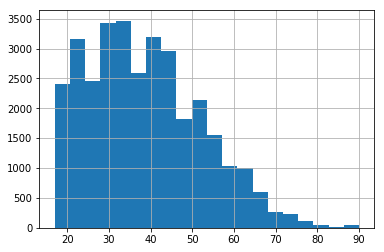

In [26]:
census['age'].hist(bins = 20)

In [0]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries=list(range(20, 70, 10)))


In [0]:
feat_cols = [gender,occupation,marital_status,relationship,education,workclass,native_country,
            age,education_num,capital_gain,capital_loss,hours_per_week]

In [0]:
input_func = tf.estimator.inputs.pandas_input_fn(x=x_train, y=y_train, batch_size=100, num_epochs=50, shuffle=True)

In [30]:
lin_mode = tf.estimator.LinearClassifier(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpk9x29gh8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f90cadbb160>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [31]:
lin_mode.train(input_fn=input_func, steps=5000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpk9x29gh8/model.ckpt.
INFO:tensorflow:loss = 69.31472, step = 1
INFO:tensorflow:global_step/sec: 165.941
INFO:tensorflow:loss = 487.56125, step = 101 (0.605 sec)
INFO:tensorflow:global_step/sec: 233.971
INFO:tensorflow:loss = 146.67891, step = 201 (0.427 sec)
INFO:tensorflow:global_step/sec: 

### Evaluation

In [0]:
train_input_func = tf.estimator.inputs.pandas_input_fn(x=x_train.iloc[:1000, :], y=y_train.iloc[:1000], batch_size=1, num_epochs=1, shuffle=False)

eval_input_func = tf.estimator.inputs.pandas_input_fn(x = x_test.iloc[:1000, :], y=y_test.iloc[:1000], batch_size=1, num_epochs=1, shuffle=False)


In [33]:
train_results = lin_mode.evaluate(train_input_func)
eval_results = lin_mode.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-13T18:10:55Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmpk9x29gh8/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-13-18:10:58
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.811, accuracy_baseline = 0.745, auc = 0.838713, auc_precision_recall = 0.93586564, average_loss = 0.58583057, global_step = 5000, label/mean = 0.745, loss = 0.58583057, precision = 0.8398533, prediction/mean = 0.75873846, recall = 0.92214763
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /tmp/tmpk9x29gh8/model.ckpt-5000
INFO:tensorflow:Calling model_fn.
INFO:

In [34]:
for key in train_results:
    print (key, train_results[key], eval_results[key])

accuracy 0.811 0.827
accuracy_baseline 0.745 0.765
auc 0.838713 0.8462467
auc_precision_recall 0.93586564 0.94008446
average_loss 0.58583057 0.52642626
label/mean 0.745 0.765
loss 0.58583057 0.52642626
precision 0.8398533 0.8609756
prediction/mean 0.75873846 0.76446617
recall 0.92214763 0.9228758
global_step 5000 5000


### Prediction

In [0]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x = x_test.iloc[:1000, :], batch_size=1, num_epochs=1, shuffle=False)


In [41]:
predictions = lin_mode.predict(pred_input_func)
pred_values = list(predictions)
print ('The classes are:')
for i in range(len(pred_values)):
    print (pred_values[i]['class_ids'], end = ' ')

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpk9x29gh8/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
The classes are:
[1] [1] [1] [1] [1] [1] [0] [1] [0] [1] [1] [1] [1] [1] [1] [1] [0] [0] [1] [1] [1] [1] [1] [1] [1] [1] [0] [1] [1] [1] [0] [1] [1] [1] [1] [1] [1] [1] [0] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [0] [0] [1] [1] [1] [1] [0] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [0] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [0] [1] [1] [1] [1] [1] [0] [1] [1] [0] [1] [0] [0] [1] [0] [1] [1] [1] [1] [1] [0] [1] [1] [1] [0] [0] [1] [1] [1] [0] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [0] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [0] [1] [0] [1] [1] [1] [1] [1] [0] [0] [0] [0] [1] [1] [1] [0] [1] [1] [0] [1] [1] [0] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1]

## DNNClassifier

In [0]:
feat_cols = [embedded_gender, embedded_occupation, embedded_marital_status, embedded_relationship, embedded_education, embedded_workclass, embedded_native_country,
            age_buckets,education_num,capital_gain,capital_loss,hours_per_week]

In [0]:
input_func = tf.estimator.inputs.pandas_input_fn(x=x_train, y=y_train, batch_size=100, num_epochs=50, shuffle=True)

In [39]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[6, 6, 6], feature_columns=feat_cols, n_classes=len(y_train.unique()))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp8tsu76os', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f90c6e38ac8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [40]:
dnn_model.train(input_fn=input_func, steps = 5000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp8tsu76os/model.ckpt.
INFO:tensorflow:loss = 4503.985, step = 1
INFO:tensorflow:global_step/sec: 135.18
INFO:tensorflow:loss = 40.79946, step = 101 (0.743 sec)
INFO:tensorflow:global_step/sec: 213.975
INFO:tensorflow:loss = 45.997845, step = 201 (0.472 sec)
INFO:tensorflow:global_step/sec: 210.275
INFO:tensorflow:loss = 40.95686, step = 301 (0.477 sec)
INFO:tensorflow:global_step/sec: 212.636
INFO:tensorflow:lo

In [0]:
Evaluation

## Evaluation

In [0]:
train_input_func = tf.estimator.inputs.pandas_input_fn(x=x_train.iloc[:1000, :], y=y_train.iloc[:1000], batch_size=100, num_epochs=1, shuffle=False)

eval_input_func = tf.estimator.inputs.pandas_input_fn(x = x_test.iloc[:1000, :], y=y_test.iloc[:1000], batch_size=100, num_epochs=1, shuffle=False)


In [43]:
train_results = dnn_model.evaluate(train_input_func)
eval_results = dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-13T18:15:00Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp8tsu76os/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-13-18:15:01
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.798, accuracy_baseline = 0.745, auc = 0.83897614, auc_precision_recall = 0.9388757, average_loss = 0.4154476, global_step = 5000, label/mean = 0.745, loss = 41.54476, precision = 0.85490197, prediction/mean = 0.75707275, recall = 0.8778523
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /tmp/tmp8tsu76os/model.ckpt-5000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-13T18:15:03Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters

In [44]:
for key in train_results:
    print (key, train_results[key], eval_results[key])

accuracy 0.798 0.82
accuracy_baseline 0.745 0.765
auc 0.83897614 0.8496676
auc_precision_recall 0.9388757 0.94644785
average_loss 0.4154476 0.39235362
label/mean 0.745 0.765
loss 41.54476 39.235363
precision 0.85490197 0.87839586
prediction/mean 0.75707275 0.760068
recall 0.8778523 0.8875817
global_step 5000 5000


## Prediction

In [45]:
predictions = dnn_model.predict(pred_input_func)
pred_values = list(predictions)
print ('The classes are:')
for i in range(len(pred_values)):
    print (pred_values[i]['class_ids'], end = ' ')

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp8tsu76os/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
The classes are:
[1] [1] [1] [1] [0] [1] [0] [1] [0] [1] [1] [1] [1] [1] [1] [1] [0] [0] [1] [1] [1] [1] [1] [1] [1] [1] [0] [1] [1] [1] [0] [1] [1] [1] [1] [1] [1] [1] [0] [1] [0] [0] [1] [1] [1] [1] [1] [1] [1] [0] [0] [0] [1] [1] [1] [1] [0] [1] [1] [1] [1] [1] [1] [1] [1] [0] [1] [1] [1] [1] [0] [0] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [0] [1] [1] [1] [1] [1] [1] [1] [1] [1] [0] [1] [1] [1] [1] [1] [1] [0] [1] [0] [1] [0] [0] [1] [0] [1] [1] [1] [1] [1] [0] [1] [1] [1] [0] [0] [1] [1] [1] [0] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [0] [1] [1] [1] [0] [1] [1] [1] [0] [1] [1] [0] [1] [0] [1] [1] [1] [1] [1] [1] [0] [0] [0] [1] [1] [1] [0] [1] [1] [0] [1] [1] [0] [0] [1] [1] [1] [1] [1] [1] [0] [0] [1]